<h1> IMDB Sentiment Analysis <h1>

<img src='https://expertsystem.com/wp-content/uploads/2019/06/Sentiment-analysis-e1566481971615.jpg' width= '800' align="center">

<h2> You seize sentiment better when you get clear of nature. You breathe it in every sense! - Jules Verne<h2>

In [1]:
#loading packages
import keras
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Embedding 
from keras.callbacks import ModelCheckpoint
import os
from sklearn.metrics import roc_auc_score, roc_curve
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<h2> Hyperparameters <h2>

In [2]:
output_dir = 'model_output/dense'

#training
epochs = 4
batch_size = 128

#vector-space
n_dim = 64
n_unique_words = 5000
n_words_to_skip = 50
max_review_length = 100
pad_type = trunc_type = 'pre'

#neural-network
n_dense = 64
dropout = 0.5

<h2> Load Data <h2>

In [3]:
(x_train, y_train), (x_valid, y_valid) = imdb.load_data(num_words=n_unique_words, skip_top=n_words_to_skip)

In [4]:
for x in x_train[0:6]:
    print(len(x))

218
189
141
550
147
43


In [5]:
word_index = keras.datasets.imdb.get_word_index()
word_index = {k:(v+3) for k,v in word_index.items()}
word_index['PAD']=0
word_index['START']=1
word_index['UNK']=2
index_word = {v:k for k,v in word_index.items()}
' '.join(index_word[id] for id in x_train[0])

"UNK UNK UNK UNK UNK brilliant casting location scenery story direction everyone's really suited UNK part UNK played UNK UNK could UNK imagine being there robert UNK UNK UNK amazing actor UNK now UNK same being director UNK father came UNK UNK same scottish island UNK myself UNK UNK loved UNK fact there UNK UNK real connection UNK UNK UNK UNK witty remarks throughout UNK UNK were great UNK UNK UNK brilliant UNK much UNK UNK bought UNK UNK UNK soon UNK UNK UNK released UNK UNK UNK would recommend UNK UNK everyone UNK watch UNK UNK fly UNK UNK amazing really cried UNK UNK end UNK UNK UNK sad UNK UNK know what UNK say UNK UNK cry UNK UNK UNK UNK must UNK been good UNK UNK definitely UNK also UNK UNK UNK two little UNK UNK played UNK UNK UNK norman UNK paul UNK were UNK brilliant children UNK often left UNK UNK UNK UNK list UNK think because UNK stars UNK play them UNK grown up UNK such UNK big UNK UNK UNK whole UNK UNK these children UNK amazing UNK should UNK UNK UNK what UNK UNK done do

In [6]:
(all_x_train,_),(all_x_valid,_)= imdb.load_data()
' '.join(index_word[id] for id in all_x_train[0])

"START this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and shou

<h2> Dense Network <h2>

In [7]:
x_train = pad_sequences(x_train, maxlen = max_review_length, padding=pad_type, truncating=trunc_type, value=0)
x_valid = pad_sequences(x_valid, maxlen = max_review_length, padding=pad_type, truncating=trunc_type, value=0)

In [8]:
def plt_dynamic(x,vy,ty,ax,colors=['b']):
  ax.plot(x,vy,'b',label='Validation Loss')
  ax.plot(x,ty,'r',label='Train Loss')
  plt.legend()
  plt.grid()
  fig.canvas.draw()

In [9]:
model = Sequential()
model.add(Embedding(n_unique_words, n_dim, input_length=max_review_length))
model.add(Flatten())
model.add(Dense(n_dense, activation = 'relu'))
model.add(Dropout(dropout))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 64)           320000    
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                409664    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 729,729
Trainable params: 729,729
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [11]:
modelcheckpoint = ModelCheckpoint(filepath=output_dir+"/weights.{epoch:02d}.hdf5")
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [12]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_valid, y_valid), callbacks=[modelcheckpoint])

Epoch 1/4
196/196 [==============================] - 2s 9ms/step - loss: 0.5414 - accuracy: 0.7053 - val_loss: 0.3483 - val_accuracy: 0.8464
Epoch 2/4
196/196 [==============================] - 2s 8ms/step - loss: 0.2787 - accuracy: 0.8910 - val_loss: 0.3428 - val_accuracy: 0.8462
Epoch 3/4
196/196 [==============================] - 2s 9ms/step - loss: 0.1160 - accuracy: 0.9661 - val_loss: 0.4291 - val_accuracy: 0.8350
Epoch 4/4
196/196 [==============================] - 2s 8ms/step - loss: 0.0239 - accuracy: 0.9960 - val_loss: 0.5391 - val_accuracy: 0.8340


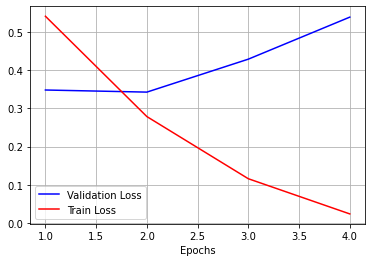

In [13]:
fig,ax=plt.subplots(1,1)
ax.set_xlabel('Epochs')

x=list(range(1,epochs+1))

vy=history.history['val_loss']
ty=history.history['loss']
plt_dynamic(x,vy,ty,ax)

In [14]:
model.load_weights(output_dir+"/weights.02.hdf5")

In [15]:
y_hat = model.predict_proba(x_valid)
y_hat[0]

Instructions for updating:
Please use `model.predict()` instead.


array([0.10363159], dtype=float32)

In [16]:
' '.join(index_word[id] for id in all_x_valid[0])

"START please give this one a miss br br kristy swanson and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite lacklustre so all you madison fans give this a miss"

In [17]:
y_valid[0]

0

In [18]:
y_hat[1234]

array([0.74463177], dtype=float32)

In [19]:
' '.join(index_word[id] for id in all_x_valid[1234])

"START though this film destroyed director and screenwriter michael cimino's career and bankrupted united artists it still stands as one of the top movies of all time there are plenty of reasons to prematurely dismiss this movie for sure among them its length its technical problems its colossal mistreatment of animals on set the list goes on and on and yet for all of this it remains a film that captures something it is a classic example of naturalistic storytelling on par with strindberg its moments lasting as long as they might in reality having not been dumbed down for good cinematic timing it feels real in its moments of anger love and war and hopelessness this film should be seen by any person who appreciates film and storytelling"

In [133]:
y_valid[1234]

1

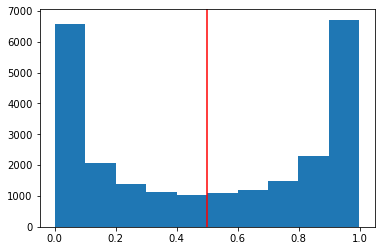

In [134]:
plt.hist(y_hat)
_=plt.axvline(x=0.5,color='red')

In [135]:
pct_auc = roc_auc_score(y_valid, y_hat)*100.0
'{:0.2f}'.format(pct_auc)

'92.42'

Coded while working through the following book: Krohn, J., Beyleveld, G., & Bassens, A. (2019). Deep Learning Illustrated: A Visual, Interactive Guide to Artificial Intelligence. Addison-Wesley Professional.